# Top 1000 Most Streamed Artists on Spotify - An Introductory EDA

<p><img src="https://www.scdn.co/i/_global/open-graph-default.png" width="800">

This project is an exploratory data analysis on the current top 1000 streaming artists on Spotify (updated on 30th September 2020). 

Information related to the number of streams for each artist on Spotify can be obtained from ChartMasters website:

https://chartmasters.org/most-streamed-artists-ever-on-spotify/. 

Note that the rankings of stream count are updated on a regular basis, such that these rankings may change at the date of viewing this notebook.

In addition, Spotify data (details of artists, album tracks and audio features) for each artist are scraped using Spotify's web API (Spotipy) on a seperate notebook. Given there is a very huge batch of data to extract from Spotify, these requests are done on smaller batches (Groups of 100 artist) to reduce possibilities of connection errors with Spotify's web API.

Further information about Spotify's web API and details of each music feature extracted from Spotify can be referenced from here: https://developer.spotify.com/documentation/web-api/reference/

## Index (Click to redirect section):
* [Data Collection](#Data-Collection)
* [Data Pre-processing](#Data-Pre-processing)
* [Data Cleaning](#Data-Cleaning)
* [What are the most popular genres for top 1000 most streamed artists on Spotify?](#What-are-the-most-popular-genres-for-top-1000-most-streamed-artists-on-Spotify?)
* [Which artists contribute most tracks to Spotify?](#Which-artists-contribute-most-tracks-to-Spotify?)
* [Which artists on Spotify are ranked top 10 for number of followers, number of streams and follower to stream count ratio?](#Which-artists-on-Spotify-are-ranked-top-10-for-number-of-followers,-number-of-streams-and-follower-to-stream-count-ratio?)
* [Which artists perform better or equal ranks between follower counts and stream counts?](#Which-artists-perform-better-or-equal-ranks-between-follower-counts-and-stream-counts?)
* [Is there a relationship between follower/stream count and overall popularity of artists?](#Is-there-a-relationship-between-follower/stream-count-and-overall-popularity-of-artists?)
* [Which variables from the tracks table can be identified as having strong correlation?](#Which-variables-from-the-tracks-table-can-be-identified-as-having-strong-correlation?)
* [Which variables (on average) from the tracks table dataset grouped by artists, album release date and key can be identified as having strong correlation?](#Which-variables-(on-average)-from-the-tracks-table-dataset-grouped-by-artists,-album-release-date-and-key-can-be-identified-as-having-strong-correlation?)
* [What is the overall trend of track features on average since 1925?](#What-is-the-overall-trend-of-track-features-on-average-since-1925?)
* [What are the number of tracks available for every music key?](#What-are-the-number-of-tracks-available-for-every-music-key?)
* [Is there a difference in distribution of acousticness between different music keys?](#Is-there-a-difference-in-distribution-of-acousticness-between-different-music-keys?)
* [Overall Music Feature Analysis for Artists and Album Tracks](#Overall-Music-Feature-Analysis-for-Artists-and-Album-Tracks)
* [BLACKPINK's Music Feature Analysis](#BLACKPINK's-Music-Feature-Analysis)

## Data Collection

Please refer to Spotify Data Extraction.ipynb for details, which can be found in this [github repository](https://github.com/YXLiaw/Top-1000-Streaming-Artists-on-Spotify-2020/blob/main/Spotify%20Data%20Extraction.ipynb).

## Data Pre-processing

In [1]:
#Import pandas, ast, math, matplotlib, seaborn, wordcloud and numpy
import pandas as pd
import ast
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading data extracted from spotify into data frame format
stream_table = pd.read_csv('Spotify streaming artists.csv') # info on spotify artists ranked by streaming count

artist_table = pd.read_csv('Top 1000 artists on Spotify.csv') # basic info for top 1000 most streamed artists on Spotify

# info on album tracks for top 1000 most streamed artists on spotify
tracks_table_1 = pd.read_csv('Albums for Top 1000 artists (1 to 100).csv') 
tracks_table_2 = pd.read_csv('Albums for Top 1000 artists (101 to 200).csv')
tracks_table_3 = pd.read_csv('Albums for Top 1000 artists (201 to 300).csv') 
tracks_table_4 = pd.read_csv('Albums for Top 1000 artists (301 to 400).csv') 
tracks_table_5 = pd.read_csv('Albums for Top 1000 artists (401 to 500).csv')
tracks_table_6 = pd.read_csv('Albums for Top 1000 artists (501 to 600).csv') 
tracks_table_7 = pd.read_csv('Albums for Top 1000 artists (601 to 700).csv')
tracks_table_8 = pd.read_csv('Albums for Top 1000 artists (701 to 800).csv') 
tracks_table_9 = pd.read_csv('Albums for Top 1000 artists (801 to 900).csv') 
tracks_table_10 = pd.read_csv('Albums for Top 1000 artists (901 to 1000).csv')

## Data Cleaning

A quick summary on some of the process of cleaning the datasets extracted from Spotify:

1. Convert stream and track count values to integers by removing unwanted characters (comma sign on numbers)
2. Compute number of genres from the length of genre list for each artist
3. Create seperate data frame containing individual observations of genre for each artist.
4. Concatenating multiple data frames of information on album tracks into single data frame.
5. Remove rows from tracks_table dataset that contain duplicate tracks, album name, main artist name, track number and release date.
6. Compute follower to stream ratio for each top 1000 most streamed aritst.
7. Rename categories of keys and modes from numbers to characters
8. Encoding data for several columns into categorical data
9. Compute rank of follower count.

In [2]:
stream_table = stream_table[['#','Artist Name', 'Streams', 'Tracks']]

#Rename columns of data frame
stream_table = stream_table.rename(columns={'#':'stream_ranking','Artist Name':'artist_name',
                                            'Streams':'stream_count','Tracks':'track_count'})

#Remove comma sign of values in stream_count and track_count columns and convert to integer data types
stream_table[['stream_count','track_count']] = stream_table[['stream_count','track_count']]\
                                            .applymap(lambda x: x.replace(',','')).astype('int64')
stream_table

,stream_ranking,artist_name,stream_count,track_count
0,1,Drake,33723846451,222
1,2,Ed Sheeran,26164166937,204
2,3,Post Malone,21230909747,63
3,4,Eminem,19964523349,265
4,5,Ariana Grande,19471692387,167
...,...,...,...,...
995,996,Dadju,862432543,68
996,997,Kina,862149371,24
997,998,Vintage Culture,860390019,136
998,999,Theory of a Deadman,859689741,118


In [3]:
# Convert string representation of list to list object for 'genre' column
artist_table['genre'] = artist_table['genre'].map(lambda x: ast.literal_eval(x))

#Set genre count to null if genre is not classified
artist_table['number_of_genres'] = artist_table['genre'].map(lambda x: len(x) if len(x)>0 else np.NaN) 
artist_table

,artist_name,follower_count,genre,artist_popularity,number_of_genres
0,Drake,49816166,"[canadian hip hop, canadian pop, hip hop, pop ...",100,6.0
1,Ed Sheeran,70179992,"[pop, uk pop]",93,2.0
2,Post Malone,28434185,"[dfw rap, melodic rap, rap]",95,3.0
3,Eminem,38231429,"[detroit hip hop, hip hop, rap]",94,3.0
4,Ariana Grande,50997684,"[dance pop, pop, post-teen pop]",94,3.0
...,...,...,...,...,...
995,Dadju,2650505,"[francoton, french hip hop, pop urbaine]",78,3.0
996,Kina,503623,"[pop, sad rap]",78,2.0
997,Vintage Culture,1351010,[brazilian edm],79,1.0
998,Theory of a Deadman,1387198,"[alternative metal, canadian metal, canadian r...",71,6.0


In [4]:
# Seperate "genre" column on a seperate table to extract genre elements for each artist
genre_table = artist_table[['artist_name','genre']].copy()

#Split elements of lists into seperate rows
genre_table = genre_table.explode('genre')
display(genre_table)
genre_table.info()

,artist_name,genre
0,Drake,canadian hip hop
0,Drake,canadian pop
0,Drake,hip hop
0,Drake,pop rap
0,Drake,rap
...,...,...
998,Theory of a Deadman,canadian rock
998,Theory of a Deadman,nu metal
998,Theory of a Deadman,post-grunge
998,Theory of a Deadman,wrestling


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  4323 non-null   object
 1   genre        4321 non-null   object
dtypes: object(2)
memory usage: 101.3+ KB


In [5]:
# Rank follower count in descending order
artist_table['follower_ranking'] = artist_table['follower_count'].rank(ascending=False).astype('int')

# Remove 'genre' column from artist_table data frame
artist_table.drop('genre',axis=1, inplace=True)

# Merging artist table and stream table into single data frame
artist_table = artist_table.merge(stream_table, on='artist_name')

# Create new column representing ratio of follower count to stream count for each artist
artist_table['follower_to_stream'] = artist_table['follower_count'] / artist_table['stream_count']

display(artist_table)
display(artist_table.describe())
artist_table.info()

,artist_name,follower_count,artist_popularity,number_of_genres,follower_ranking,stream_ranking,stream_count,track_count,follower_to_stream
0,Drake,49816166,100,6.0,3,1,33723846451,222,0.001477
1,Ed Sheeran,70179992,93,2.0,1,2,26164166937,204,0.002682
2,Post Malone,28434185,95,3.0,12,3,21230909747,63,0.001339
3,Eminem,38231429,94,3.0,5,4,19964523349,265,0.001915
4,Ariana Grande,50997684,94,3.0,2,5,19471692387,167,0.002619
...,...,...,...,...,...,...,...,...,...
995,Dadju,2650505,78,3.0,467,996,862432543,68,0.003073
996,Kina,503623,78,2.0,949,997,862149371,24,0.000584
997,Vintage Culture,1351010,79,1.0,750,998,860390019,136,0.001570
998,Theory of a Deadman,1387198,71,6.0,743,999,859689741,118,0.001614


,follower_count,artist_popularity,number_of_genres,follower_ranking,stream_ranking,stream_count,track_count,follower_to_stream
count,1.000000e+03,1000.00000,998.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,4.239505e+06,78.52700,4.329659,500.500000,500.500000,2.653688e+09,250.281000,0.001545
std,5.910078e+06,6.26758,2.200698,288.819436,288.819436,2.990266e+09,801.700649,0.001023
min,1.201600e+04,52.00000,1.000000,1.000000,1.000000,8.593804e+08,10.000000,0.000011
25%,1.350111e+06,74.00000,3.000000,250.750000,250.750000,1.102494e+09,77.000000,0.000940
50%,2.453318e+06,78.00000,4.000000,500.500000,500.500000,1.613084e+09,133.000000,0.001443
75%,4.505830e+06,82.00000,6.000000,750.250000,750.250000,2.895297e+09,234.500000,0.001926
max,7.017999e+07,100.00000,12.000000,1000.000000,1000.000000,3.372385e+10,16514.000000,0.019944


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         1000 non-null   object 
 1   follower_count      1000 non-null   int64  
 2   artist_popularity   1000 non-null   int64  
 3   number_of_genres    998 non-null    float64
 4   follower_ranking    1000 non-null   int32  
 5   stream_ranking      1000 non-null   int64  
 6   stream_count        1000 non-null   int64  
 7   track_count         1000 non-null   int64  
 8   follower_to_stream  1000 non-null   float64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 74.2+ KB


In [6]:
# Concatenate ten datasets of album tracks into single data frame
tracks_table = pd.concat([tracks_table_1, tracks_table_2, tracks_table_3, tracks_table_4, tracks_table_5, tracks_table_6,
                         tracks_table_7, tracks_table_8, tracks_table_9, tracks_table_10], axis=0)
tracks_table

,album,main_artist_name,release_date,album_popularity,track_number,track_name,disc_number,uri,duration_ms,key,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity,explicit
0,Dark Lane Demo Tapes,Drake,2020-05-01,88,1,Deep Pockets,1,spotify:track:3IvMYBE7A3c7to1aEcfFJk,222929.0,7.0,...,0.473,0.824,0.000000,0.6050,-3.680,0.163,77.888,0.3740,65,True
1,Dark Lane Demo Tapes,Drake,2020-05-01,88,2,When To Say When,1,spotify:track:5TCBWmEBrin7etRa4Lswr1,223124.0,1.0,...,0.410,0.820,0.000000,0.5380,-6.808,0.533,170.718,0.5260,66,True
2,Dark Lane Demo Tapes,Drake,2020-05-01,88,3,Chicago Freestyle (feat. Giveon),1,spotify:track:4wVOKKEHUJxHCFFNUWDn0B,220488.0,10.0,...,0.735,0.449,0.000000,0.1130,-7.507,0.347,122.947,0.0397,85,True
3,Dark Lane Demo Tapes,Drake,2020-05-01,88,4,Not You Too (feat. Chris Brown),1,spotify:track:3Q4gttWQ6hxqWOa3tHoTNi,269680.0,9.0,...,0.458,0.452,0.000019,0.0703,-9.299,0.047,86.318,0.3160,70,True
4,Dark Lane Demo Tapes,Drake,2020-05-01,88,5,Toosie Slide,1,spotify:track:466cKvZn1j45IpxDdYZqdA,247059.0,1.0,...,0.830,0.490,0.000003,0.1130,-8.820,0.209,81.604,0.8450,82,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66662,Sway,Marian Hill,2015-02-17,58,3,Lips,1,spotify:track:2MHdIP9qDvpHDsJfIXp0j6,198907.0,4.0,...,0.818,0.332,0.000174,0.0986,-11.873,0.269,88.946,0.6600,43,False
66663,Sway,Marian Hill,2015-02-17,58,4,Wasted,1,spotify:track:1OIZBoGN33Y1hDdkzo21Hp,217253.0,4.0,...,0.779,0.510,0.468000,0.1330,-8.095,0.362,169.994,0.6890,35,False
66664,Sway,Marian Hill,2015-02-17,58,5,Lovit,1,spotify:track:2Ag3LUfgpN6ymEMwDOqKdg,173013.0,5.0,...,0.607,0.384,0.032800,0.1190,-11.934,0.420,36.280,0.2740,47,False
66665,Sway,Marian Hill,2015-02-17,58,6,Deep,1,spotify:track:3Yn83dJGBWtL0icQirgyp6,206693.0,6.0,...,0.710,0.256,0.181000,0.0832,-10.112,0.199,75.026,0.2850,39,False


In [7]:
tracks_table = tracks_table[tracks_table.duplicated(['track_name','main_artist_name','album','track_number','release_date'],\
                                                    keep='first')==False].reset_index(drop=True).copy()
tracks_table.describe()

,album_popularity,track_number,disc_number,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity
count,339733.000000,339733.000000,339733.000000,3.320600e+05,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,332060.000000,339733.000000
mean,35.131656,30.121669,1.269241,2.263834e+05,5.209751,0.682675,3.807836,0.537798,0.486431,0.450250,0.283857,0.233271,-13.317379,0.090920,114.862945,0.444480,17.308277
std,21.899618,71.598518,1.329261,1.371968e+05,3.521158,0.465436,0.600684,0.398322,0.187615,0.305988,0.392661,0.226100,8.087360,0.132767,31.393153,0.263018,18.069839
min,0.000000,1.000000,1.000000,1.280000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,5.000000,1.000000,1.559330e+05,2.000000,0.000000,4.000000,0.095000,0.344000,0.157000,0.000000,0.099400,-19.452000,0.036600,90.155000,0.221000,1.000000
50%,34.000000,9.000000,1.000000,2.090670e+05,5.000000,1.000000,4.000000,0.601000,0.483000,0.439000,0.001480,0.132000,-10.955000,0.045300,113.906000,0.421000,11.000000
75%,52.000000,16.000000,1.000000,2.662270e+05,8.000000,1.000000,4.000000,0.964000,0.628000,0.725000,0.799000,0.277000,-6.483000,0.072800,135.409000,0.651000,29.000000
max,100.000000,545.000000,35.000000,4.777827e+06,11.000000,1.000000,5.000000,0.996000,0.989000,1.000000,1.000000,1.000000,0.932000,0.969000,248.060000,1.000000,97.000000


In [8]:
def category_conv(df, *args):
    for item in args:
        #setting column of a specified data frame as categorical data type
        df[item]=df[item].astype('category')
    return df.info()

In [9]:
# Set release date column as datetime object
tracks_table['release_date'] = tracks_table['release_date'].astype('datetime64')

# Convert multiple columns into categorical data
category_conv(tracks_table, ['track_number','key','mode','disc_number'])

# Rename categories for keys and mode
tracks_table['key'] = tracks_table['key'].cat.rename_categories({0 : "C", 1 : "C♯,Db", 2 : "D", 3 : "D♯,Eb", 4 : "E",\
                                           5 :  "F", 6 : "F♯,Gb", 7 : "G", 8 : "G♯,Ab", 9 : "A", 10 : "A♯,Bb",11 : "B"})

tracks_table['mode'] = tracks_table['mode'].cat.rename_categories({0 : "Minor", 1 : "Major"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339733 entries, 0 to 339732
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   album             339733 non-null  object        
 1   main_artist_name  339733 non-null  object        
 2   release_date      339733 non-null  datetime64[ns]
 3   album_popularity  339733 non-null  int64         
 4   track_number      339733 non-null  category      
 5   track_name        339733 non-null  object        
 6   disc_number       339733 non-null  category      
 7   uri               339733 non-null  object        
 8   duration_ms       332060 non-null  float64       
 9   key               332060 non-null  category      
 10  mode              332060 non-null  category      
 11  time_signature    332060 non-null  float64       
 12  acousticness      332060 non-null  float64       
 13  danceability      332060 non-null  float64       
 14  ener

## Note on Missing Values

1. There are currently 2 artists that are not being assigned to any particular genre on Spotify.

2. There are 34 artists that currently do not produce any albums. On closer inspection, these artists mainly produce singles and extended plays. Therefore, the tracks_table dataset will only contain 966 artists with details on their albums produced.

3. There are 7673 tracks with missing information on its audio features.

In [10]:
# Checking which artist's genre is not classified by Spotify
genre_table[genre_table['genre'].isnull()]

,artist_name,genre
518,R. Kelly,NaN
994,NEFFEX,NaN


In [11]:
# Check if any top 1000 most streamed artists do not have album tracks
artist_table[artist_table['artist_name'].isin(tracks_table['main_artist_name'])==False]

,artist_name,follower_count,artist_popularity,number_of_genres,follower_ranking,stream_ranking,stream_count,track_count,follower_to_stream
172,Cheat Codes,1700139,80,9.0,674,173,3768926312,107,0.000451
254,Lil Nas X,3558287,79,3.0,341,255,2861995827,13,0.001243
312,Tones And I,2111520,83,2.0,564,313,2414167232,13,0.000875
337,Alok,8542540,83,2.0,106,338,2282542474,121,0.003743
366,Lenny Tavárez,859840,90,2.0,878,367,2107153135,65,0.000408
367,Grey,50247,73,1.0,994,368,2100165991,42,0.000024
418,Normani,982451,76,4.0,844,419,1905905714,12,0.000515
503,MC Kevinho,7187287,76,3.0,131,504,1606229092,54,0.004475
556,Astrid S,665541,76,7.0,919,557,1476374666,99,0.000451
573,Martin Jensen,963179,77,8.0,849,574,1437940102,64,0.000670


In [12]:
# Checking which tracks from tracks_table dataset have missing audio features
tracks_table[tracks_table['key'].isnull()]

,album,main_artist_name,release_date,album_popularity,track_number,track_name,disc_number,uri,duration_ms,key,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity,explicit
10111,The Beatles,The Beatles,2018-11-09,66,16,The Continuing Story Of Bungalow Bill - Take 2,6,spotify:track:40uYylxfx6jwhlF6VF5ULz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,False
10112,The Beatles,The Beatles,2018-11-09,66,17,Why Don’t We Do It In The Road? - Take 5,6,spotify:track:3BOMaaOFlOXCu00eyMbajU,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,False
10113,The Beatles,The Beatles,2018-11-09,66,18,Julia - Two Rehearsals,6,spotify:track:7FJRlsFylyJrYLGUeZYyLv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,False
10114,The Beatles,The Beatles,2018-11-09,66,19,The Inner Light - Take 6 / Instrumental Backin...,6,spotify:track:1N5MR6p2DwOQ8puC9mSMoR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,False
10115,The Beatles,The Beatles,2018-11-09,66,20,Lady Madonna - Take 2 / Piano & Drums,6,spotify:track:2E7V8BNpKu8EjNRIECvvS4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332860,Picture Book,The Kinks,2008-12-08,2,13,Only a Dream,6,spotify:track:3UKJc3dM50I8aul8Aosh5J,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
332861,Picture Book,The Kinks,2008-12-08,2,14,Drift Away,6,spotify:track:4LImeLWF7xEYD2CLFOHz5L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
332862,Picture Book,The Kinks,2008-12-08,2,15,Scattered,6,spotify:track:63kNXRAvxefkgdIyD7jBey,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
332863,Picture Book,The Kinks,2008-12-08,2,16,Do You Remember Walter? (Live),6,spotify:track:4EZBOWKUBqhf1QOUQuXlSp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


## What are the most popular genres for top 1000 most streamed artists on Spotify?

From the top 1000 most streamed artists on Spotify, we can visualize the most common music genres available for listeners to listen to.

In [13]:
genres = genre_table['genre'].value_counts()
genres

pop                   296
dance pop             204
pop rap               136
rap                   130
rock                  114
                     ... 
australian country      1
australian hip hop      1
new orleans jazz        1
art punk                1
nu jazz                 1
Name: genre, Length: 595, dtype: int64

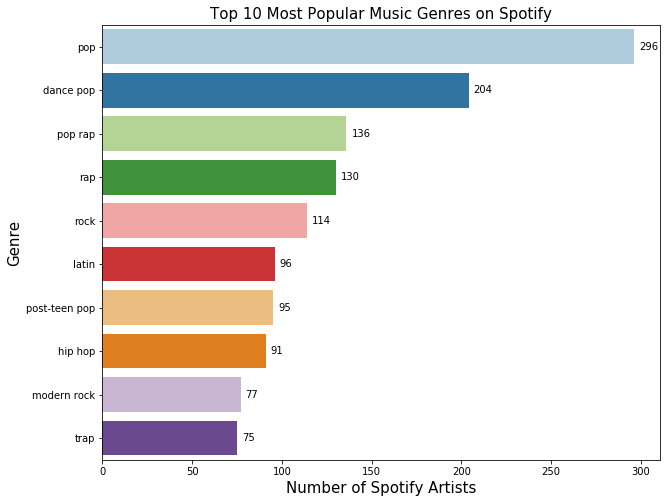

In [14]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.barplot(genres.head(10).values, genres.head(10).index, palette='Paired')
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for positive and negative values.
plt.title("Top 10 Most Popular Music Genres on Spotify", fontsize=15)
plt.xlabel('Number of Spotify Artists', fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.show()

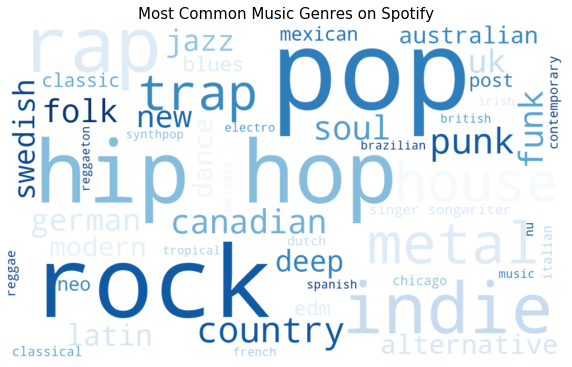

In [15]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 50,
                      background_color='white' , colormap="Blues").generate(" ".join(genres.index))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Music Genres on Spotify", fontsize=15)
plt.show()

## Which artists contribute most tracks to Spotify?

Given Spotify classifies music genres very specifically, pop music dominates the Spotify market, followed by dance pop and pop rap music based on the bar plot above. Word cloud on the other hand provides a bigger picture on the most common genres found within top 1000 most streamed artists on Spotify. While pop music appears most often, hip hop, rock, indie and metal music also provides great significance to its availability on Spotify.

Now, we will look at artists that contribute most tracks to Spotify.

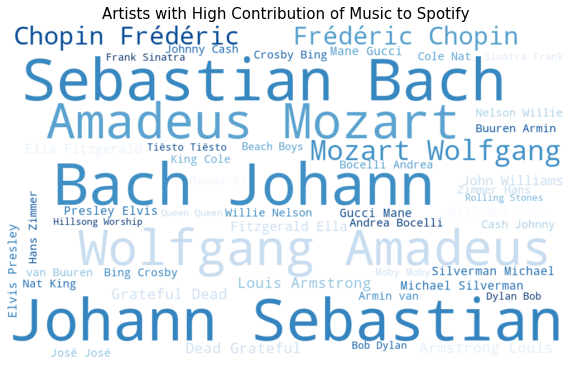

In [16]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 50,
                      background_color='white', colormap='Blues').generate(" ".join(tracks_table['main_artist_name']))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Artists with High Contribution of Music to Spotify", fontsize=15)
plt.show()

## Which artists on Spotify are ranked top 10 for number of followers, number of streams and follower to stream count ratio?

Old music composer legends like Johann Sebastian Bach contributes the most number of tracks to Spotify, followed by Wolfgang Amadeus Mozart and Frederic Chopin. However, their stream count ranking is much lower (>500th rank) compared to other artists that can be found on the word cloud above, like Gucci Mane (146th) and Elvis Presley (197th).

Another important analysis to look into is the artists' ranking on number of followers, number of streams and the ratio between follower and stream count. 
More specifcally, we will analyze the top 10 artists for each of these variables mentioned.

In [17]:
top10followers= artist_table[['artist_name','follower_count']].nlargest(10, 'follower_count').reset_index(drop=True)
top10streamers= artist_table[['artist_name','stream_count']].nlargest(10, 'stream_count').reset_index(drop=True)
top10ftsratio = artist_table[['artist_name','follower_to_stream','stream_ranking']].nlargest(10, 'follower_to_stream')\
                .reset_index(drop=True)
display(top10followers)
display(top10streamers)
display(top10ftsratio)

,artist_name,follower_count
0,Ed Sheeran,70179992
1,Ariana Grande,50997684
2,Drake,49816166
3,Rihanna,39258925
4,Eminem,38231429
5,Justin Bieber,38109744
6,Billie Eilish,33225972
7,Taylor Swift,32623722
8,Imagine Dragons,30017677
9,Shawn Mendes,29169111


,artist_name,stream_count
0,Drake,33723846451
1,Ed Sheeran,26164166937
2,Post Malone,21230909747
3,Eminem,19964523349
4,Ariana Grande,19471692387
5,Justin Bieber,18413292635
6,The Weeknd,18126102439
7,J Balvin,17889483333
8,Bad Bunny,17102792107
9,Kanye West,14916429653


,artist_name,follower_to_stream,stream_ranking
0,Arijit Singh,0.019944,939
1,Mc Livinho,0.005625,818
2,Projota,0.005300,955
3,Maiara & Maraisa,0.004938,492
4,Marília Mendonça,0.004872,193
5,BLACKPINK,0.004650,208
6,Simone & Simaria,0.004611,842
7,MC Kevinho,0.004475,504
8,Zé Neto & Cristiano,0.004336,271
9,Guns N' Roses,0.004255,137


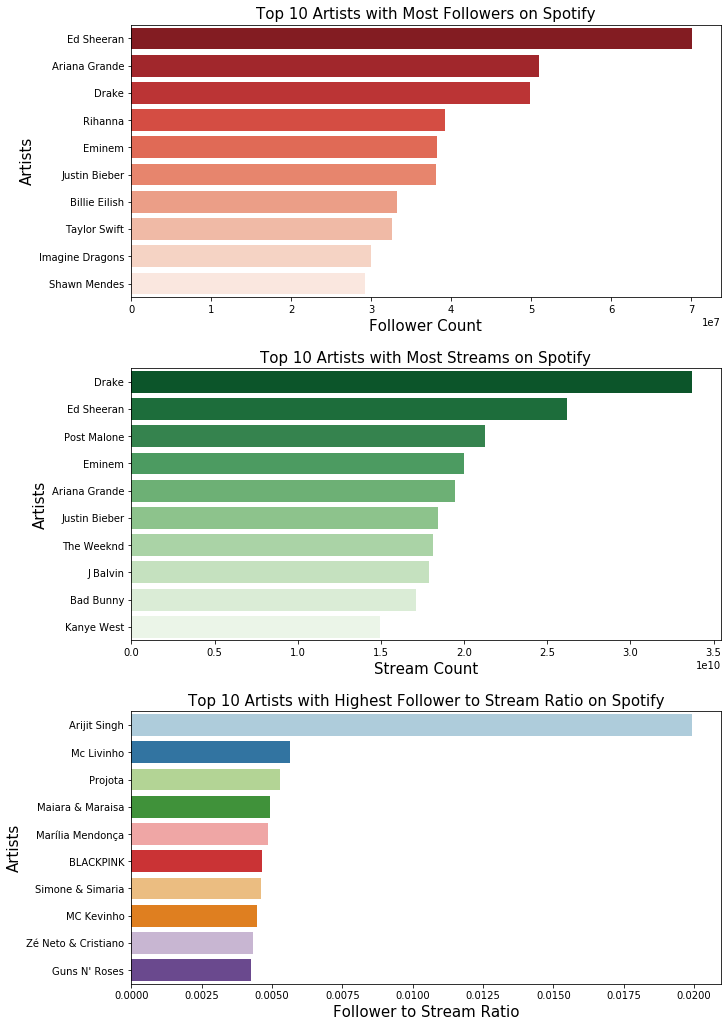

In [18]:
plt.rcParams["figure.figsize"] = (10,15)
fig, ax = plt.subplots(3,1)
fig.tight_layout(pad=5)
figure1 = sns.barplot(data = top10followers, x='follower_count', y='artist_name', palette='Reds_r', ax=ax[0])
figure2 = sns.barplot(data = top10streamers, x='stream_count', y='artist_name', palette='Greens_r', ax=ax[1])
figure3 = sns.barplot(data = top10ftsratio, x='follower_to_stream', y='artist_name', palette='Paired', ax=ax[2])

figure1.set_title("Top 10 Artists with Most Followers on Spotify", fontsize=15)
figure1.set_xlabel('Follower Count', fontsize=15)
figure1.set_ylabel('Artists',fontsize=15)

figure2.set_title("Top 10 Artists with Most Streams on Spotify", fontsize=15)
figure2.set_xlabel('Stream Count', fontsize=15)
figure2.set_ylabel('Artists',fontsize=15)

figure3.set_title("Top 10 Artists with Highest Follower to Stream Ratio on Spotify", fontsize=15)
figure3.set_xlabel('Follower to Stream Ratio', fontsize=15)
figure3.set_ylabel('Artists',fontsize=15)

plt.show()

## Which artists perform better or equal ranks between follower counts and stream counts?

From the three charts above, Drake had the most number of streams on Spotify with clear majority, followed by Ed Sheeran, who had the most number of followers on Spotify. Younger artists like Billie Eilish and Shawn Mendes also made into the top 10 most number of followers on Spotify. 

Drake, Ariana Grande, Justin Bieber and Ed Sheeran appear in the ranking for both top 10 most number of followers and streams on Spotify.

Looking at the followers to stream ratio, there is a clear imbalance between number of followers and number of streams on Spotify with the highest ratio being only 0.02 for Arijit Singh. Artists with lower ranks on stream count (>500th) tend to ranked higher for followers to stream ratio, with some exceptions like Marília Mendonça and BLACKPINK (currently ranked 193rd and 208th respectively for number of streams on Spotify) 

Next, we would look at an overview on the current relative ranks between follower counts and stream counts for each artist (i.e which artists have higher ranks on follower count than stream count and vice versa?)


In [19]:
artist_table['Better_rank_on_follower'] = np.where(artist_table['follower_ranking']<artist_table['stream_ranking'],\
                True,np.where(artist_table['follower_ranking']>artist_table['stream_ranking'],False,'Equal'))
artist_table.groupby('Better_rank_on_follower')['artist_name'].count()

Better_rank_on_follower
Equal      4
False    488
True     508
Name: artist_name, dtype: int64

In [20]:
# Dataset on artists that have equal ranks for both follower count and stream count
artist_table[artist_table['Better_rank_on_follower']=='Equal']

,artist_name,follower_count,artist_popularity,number_of_genres,follower_ranking,stream_ranking,stream_count,track_count,follower_to_stream,Better_rank_on_follower
5,Justin Bieber,38109744,94,3.0,6,6,18413292635,187,0.002070,Equal
12,Coldplay,27234873,89,2.0,13,13,14501508428,271,0.001878,Equal
39,One Direction,17927960,91,4.0,40,40,9691778163,123,0.001850,Equal
203,Florence + The Machine,5301063,78,4.0,204,204,3305777182,158,0.001604,Equal


## Is there a relationship between follower/stream count and overall popularity of artists?

Currently, there is almost a perfect balance between artists that have higher ranks on stream count vs artists that have higher ranks on follower count. Note that there are 4 artists that have equal ranks between stream and follower count from the table above.

In general, artists that have more followers and streams are more likely to be popular. Using the artist_table dataset, we could validate on whether there is a relationship between these variables using correlation heatmaps and pair-plots. In addition, there may be other variables that are also significant for predicting artist popularity.

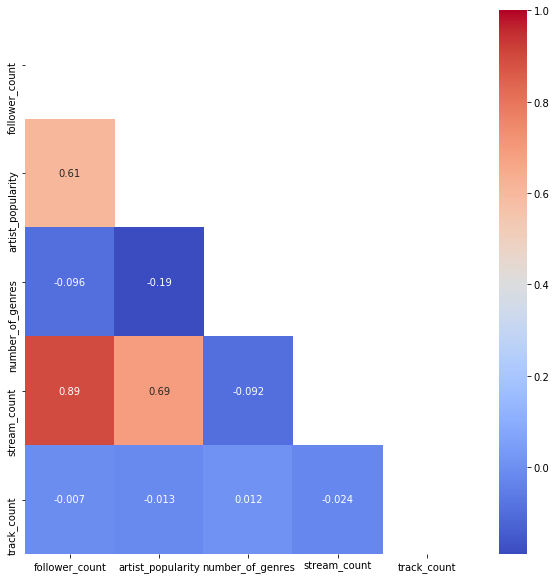

In [21]:
plt.rcParams["figure.figsize"] = (10,10)
mask = np.zeros_like(artist_table[['follower_count','artist_popularity','number_of_genres','stream_count',\
                                   'track_count']].corr())
# Plot heatmap on the lower-left triangle part to avoid redundancy
mask[np.triu_indices_from(mask)] = True
sns.heatmap(artist_table[['follower_count','artist_popularity','number_of_genres','stream_count','track_count']].corr(),\
            annot=True,cmap='coolwarm',mask=mask)
plt.show()

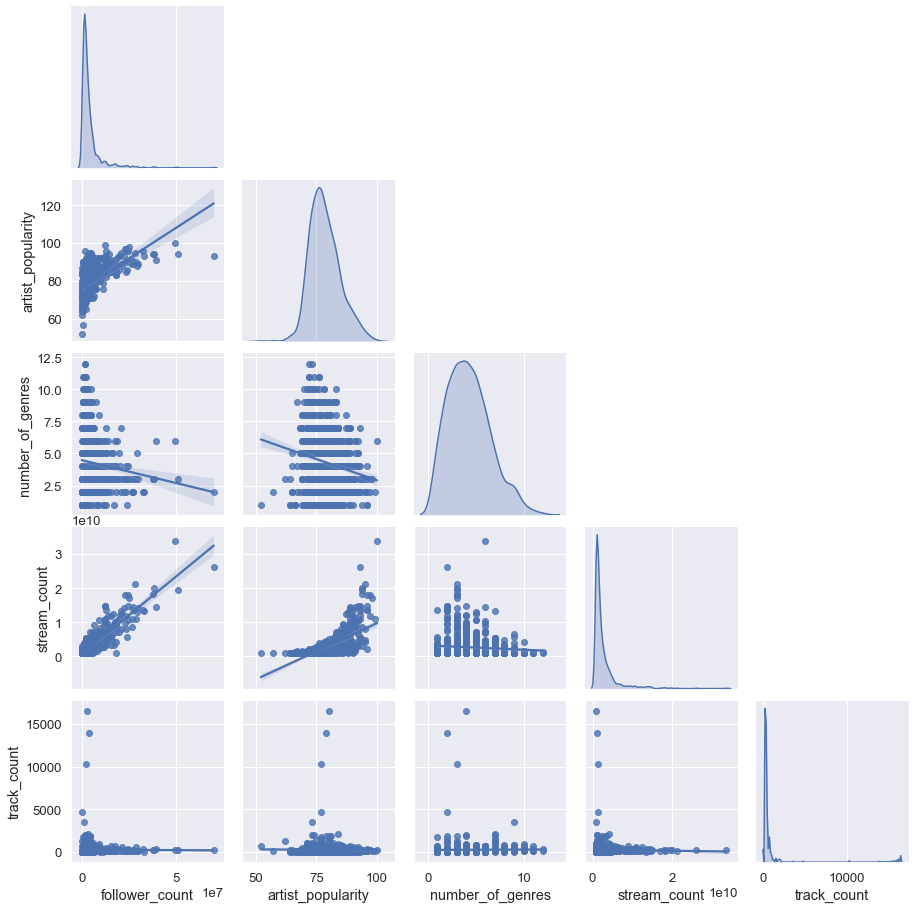

In [22]:
plt.rcParams["figure.figsize"] = (20,20)
sns.set(font_scale=1.2, style='darkgrid')
sns.pairplot(artist_table[['follower_count','artist_popularity','number_of_genres','stream_count','track_count']],\
             diag_kind='kde',kind='reg',corner=True)
plt.show()

## Which variables from the tracks table can be identified as having strong correlation?

From both heatmap and pairplot above, there is a very strong positive correlation betweeen stream count and follower count and there is a moderately strong positive correlation between stream count/follower count and artist popularity.

While distribution of artist popularity and number of genres for top 1000 most streamed artists are mildly left-skewed and right-skewed respectively, distributions for follower count, stream count and track count are heavily right skewed (due to a few older artists that have more than 10000 tracks)

On a different dataset (tracks_table), we can also validate on whether there is a relationship between multiple variables using correlation heatmaps.

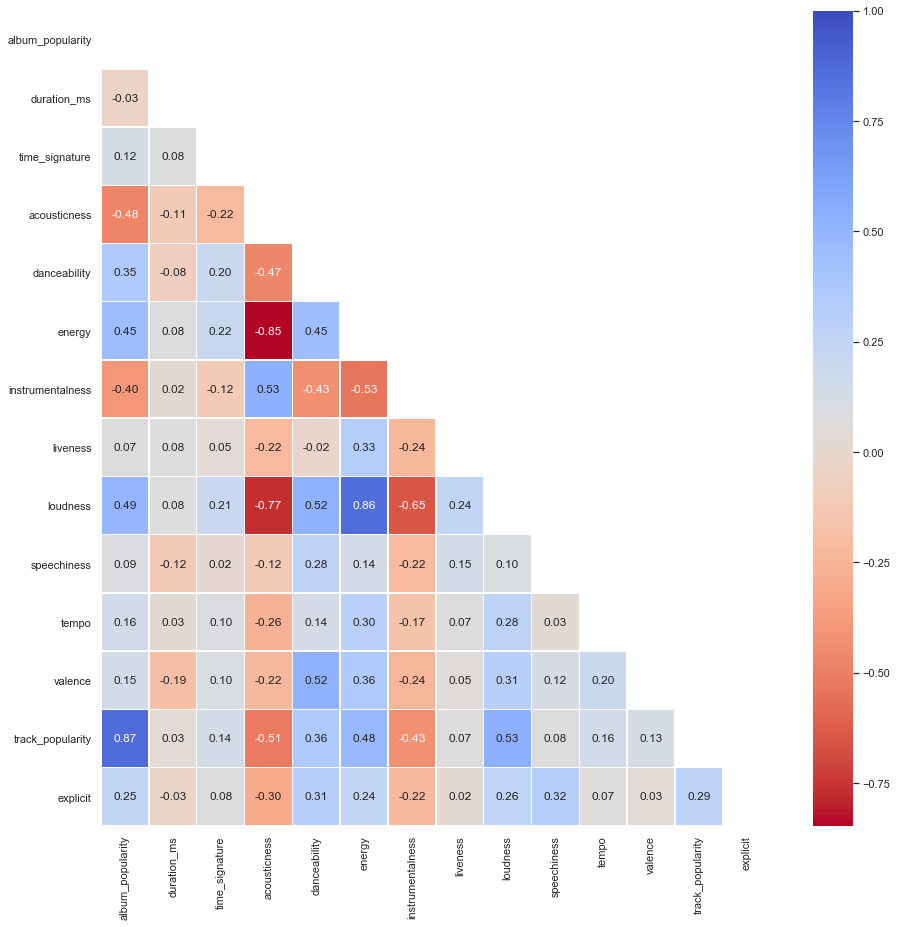

In [23]:
plt.rcParams["figure.figsize"] = (15,15)
sns.set(style='white')
mask = np.zeros_like(tracks_table.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(tracks_table.corr(),annot=True,cmap='coolwarm_r',linewidths=0.5,fmt='.2f', mask=mask)
plt.show()

## Which variables (on average) from the tracks table dataset grouped by artists, album release date and key can be identified as having strong correlation?

The heatmap above identified four potential strong correlations (> 0.7 or < -0.7) between variables in tracks_table as follows:
1. Positive correlation between track popularity and album popularity (0.87)
2. Positive correlation between energy and loudness (0.86)
3. Negative correlation between acousticness and loudness (-0.77)
4. Negative correlation between acousticness and energy (-0.85)

For subsequent parts of the data analysis, we will group the tracks_table dataset using the following variables:
1. artist names
2. album release dates by year
3. keys (track feature)

In addition, track features like acousticness, danceability, energy etc. will also be used to compute the average of each individual track feature based on the grouped variables above.

In [24]:
artist_group = tracks_table.groupby(['main_artist_name'])[['acousticness','danceability','energy','instrumentalness',\
                                                           'liveness','loudness','speechiness','tempo','valence']].mean()
artist_group

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
main_artist_name,,,,,,,,,
$uicideBoy$,0.158388,0.727656,0.601666,5.768669e-02,0.217475,-7.132047,0.136208,120.314125,0.287758
*NSYNC,0.146974,0.619602,0.733195,3.139330e-03,0.247475,-6.326982,0.045871,114.917018,0.602319
2 Chainz,0.165591,0.715014,0.629254,3.303933e-03,0.285170,-7.275298,0.265139,124.878412,0.471766
21 Savage,0.148118,0.800619,0.510791,1.086567e-01,0.177766,-8.534006,0.250368,130.146194,0.346948
24kGoldn,0.118910,0.742500,0.617000,1.530000e-07,0.133370,-5.900900,0.171190,134.327500,0.520500
...,...,...,...,...,...,...,...,...,...
deadmau5,0.117356,0.688433,0.621542,6.481678e-01,0.193583,-9.374365,0.089228,124.455223,0.281283
fun.,0.266603,0.529635,0.639058,1.043882e-03,0.190006,-6.050154,0.062169,131.016827,0.485712
gnash,0.514310,0.661585,0.371829,3.341515e-03,0.182715,-11.371512,0.196868,106.935927,0.304568


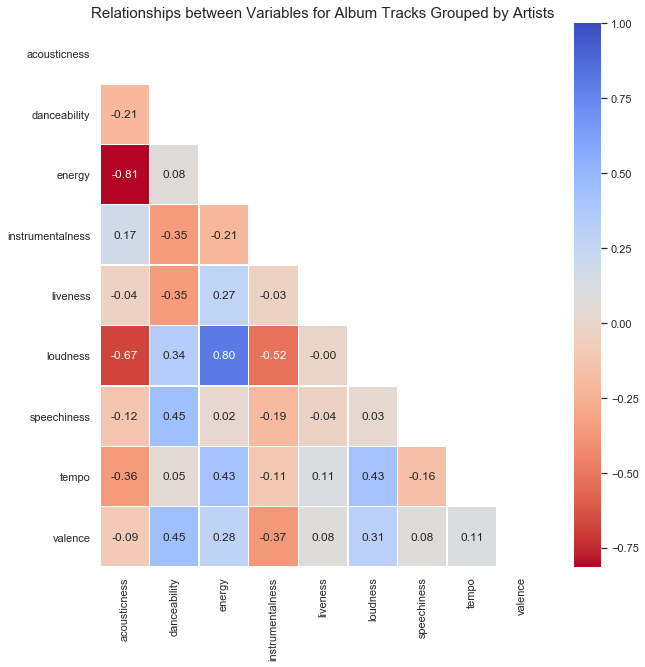

In [25]:
plt.rcParams["figure.figsize"] = (10,10)
mask = np.zeros_like(artist_group.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(artist_group.corr(),annot=True,cmap='coolwarm_r',linewidths=0.5,fmt='.2f', mask=mask)
plt.title('Relationships between Variables for Album Tracks Grouped by Artists', fontsize=15)
plt.show()

The heatmap above identified two potential strong correlations (> 0.7 or < -0.7) between variables in artist_group table as follows:
1. Positive correlation between energy and loudness (0.80)
2. Negative correlation between acousticness and energy (-0.81)

In [26]:
year_group = tracks_table[['acousticness','danceability','energy','instrumentalness','liveness','loudness',\
                           'speechiness','tempo','valence']].groupby([tracks_table.release_date.dt.year]).mean()
year_group = year_group[year_group.index>=1925]
year_group

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
release_date,,,,,,,,,
1925,0.907817,0.636404,0.276077,0.285288,0.166943,-12.740721,0.100876,123.179865,0.699221
1926,0.960346,0.686038,0.261694,0.501462,0.183835,-11.749769,0.155848,118.518038,0.788481
1928,0.924643,0.651571,0.250116,0.430715,0.217079,-13.045161,0.104196,118.170696,0.627589
1929,0.883357,0.537071,0.276343,0.231874,0.339743,-12.851071,0.065586,120.502786,0.552643
1930,0.791067,0.553400,0.358000,0.099315,0.282953,-11.119267,0.114380,128.059533,0.590933
...,...,...,...,...,...,...,...,...,...
2016,0.570212,0.482507,0.420229,0.287967,0.220552,-13.840110,0.103552,114.520493,0.418833
2017,0.576039,0.480470,0.414066,0.287269,0.215756,-13.822413,0.097448,114.203401,0.416985
2018,0.565534,0.483703,0.420483,0.286842,0.216585,-13.801706,0.106539,113.487186,0.421968


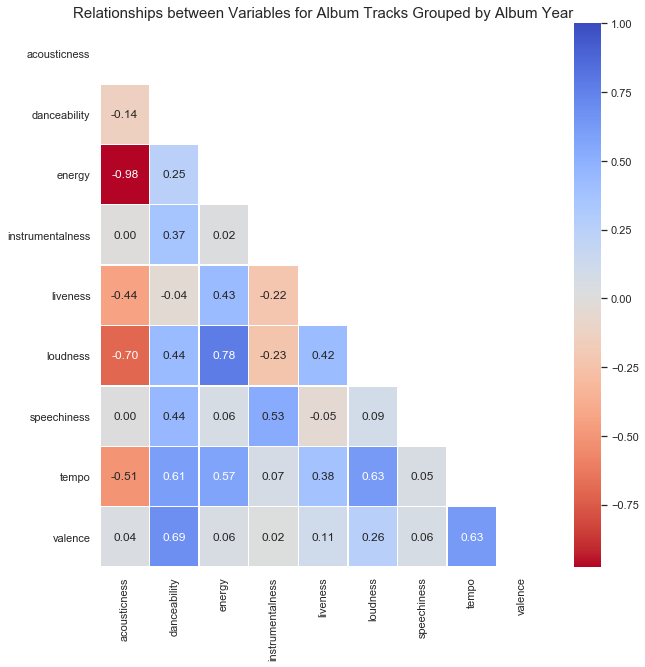

In [27]:
plt.rcParams["figure.figsize"] = (10,10)
mask = np.zeros_like(year_group.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(year_group.corr(),annot=True,cmap='coolwarm_r',linewidths=0.5,fmt='.2f', mask=mask)
plt.title('Relationships between Variables for Album Tracks Grouped by Album Year', fontsize=15)
plt.show()

The heatmap above identified three potential strong correlations (> 0.7 or < -0.7) between variables in year_group table as follows:
1. Positive correlation between energy and loudness (0.78)
2. Negative correlation between acousticness and loudness (-0.70)
3. Negative correlation between acousticness and energy (-0.98)

In [28]:
key_group = tracks_table[['acousticness','danceability','energy','instrumentalness','liveness','loudness',\
                           'speechiness','tempo','valence']].groupby([tracks_table.key]).mean()
key_group

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
key,,,,,,,,,
C,0.550031,0.485648,0.443506,0.277566,0.241637,-12.949627,0.080864,115.475754,0.448623
"C♯,Db",0.451407,0.522716,0.495477,0.262280,0.217664,-12.466209,0.122805,113.916639,0.426276
D,0.531552,0.468821,0.453853,0.285721,0.243202,-13.113791,0.078616,115.791294,0.437604
"D♯,Eb",0.718110,0.439972,0.323495,0.383393,0.195112,-16.198979,0.072979,112.688104,0.420088
E,0.513809,0.476287,0.477396,0.276431,0.252880,-12.993244,0.079491,114.745354,0.428244
F,0.599380,0.470763,0.403296,0.302798,0.225826,-14.213006,0.083849,113.425650,0.427094
"F♯,Gb",0.463896,0.499009,0.501481,0.237516,0.229002,-12.506394,0.112039,114.153742,0.452783
G,0.572285,0.479028,0.427478,0.324360,0.241696,-13.946730,0.080654,115.063793,0.468668
"G♯,Ab",0.545704,0.486568,0.443837,0.286796,0.210609,-13.558647,0.110744,112.794196,0.427054


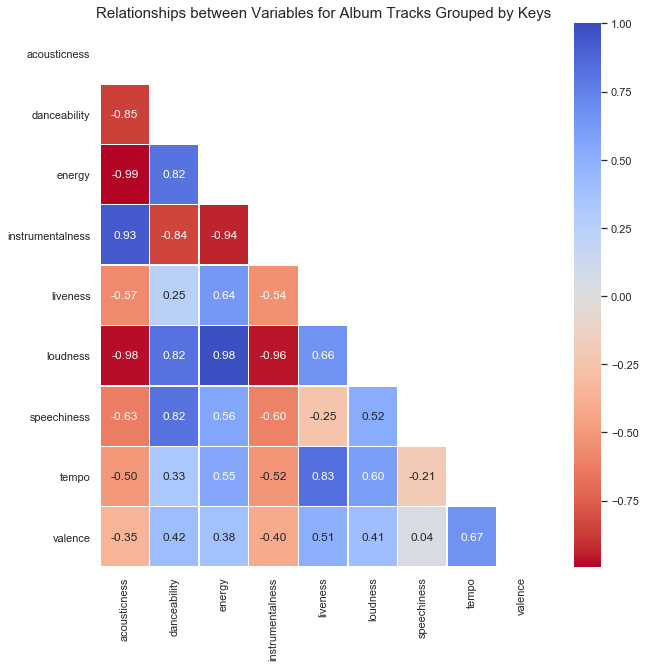

In [29]:
plt.rcParams["figure.figsize"] = (10,10)
mask = np.zeros_like(key_group.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(key_group.corr(),annot=True,cmap='coolwarm_r',linewidths=0.5,fmt='.2f', mask=mask)
plt.title('Relationships between Variables for Album Tracks Grouped by Keys', fontsize=15)
plt.show()

The heatmap above identified ten potential strong correlations (> 0.7 or < -0.7) between variables in key_group table as follows:
1. Positive correlation between energy and loudness (0.98)
2. Positive correlation between acousticness and instrumentalness (0.93)
3. Positive correlation between livenss and tempo (0.83)
4. Positive correlation between danceability and speechiness/loudness/energy (0.82)
5. Negative correlation between danceability and instrumentalness (-0.84)
6. Negative correlation between acousticness and danceability (-0.85)
7. Negative correlation between energy and instrumentalness (-0.94)
8. Negative correlation between loudness and instrumentalness (-0.96)
9. Negative correlation between acousticness and loudness (-0.98)
10. Negatiive correlation between acousticness and energy (-0.99)

## What is the overall trend of track features on average since 1925?

By grouping the album tracks data based on album year, we can perform a time series analysis on the trend of track features over the past 95 years since 1925

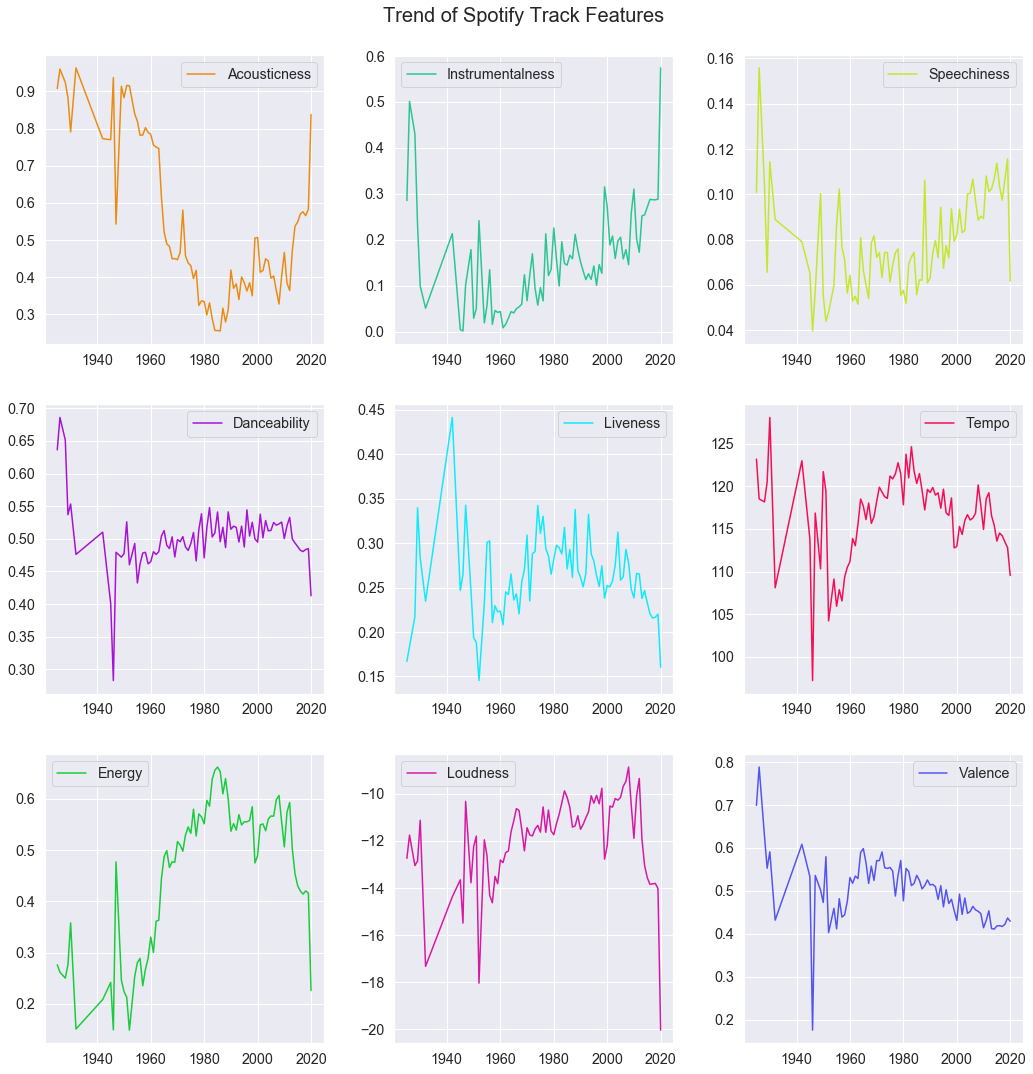

In [30]:
plt.rcParams["figure.figsize"] = (15,15)
sns.set(font_scale=1.3, style='darkgrid')
fig, ax = plt.subplots(3,3)
fig.tight_layout(pad=2)
label_list = ['Acousticness','Danceability','Energy','Instrumentalness','Liveness','Loudness','Speechiness','Tempo','Valence']
color_list = ['#EB8C11','#A712D4','#17CD3B','#29C691','#0FEBFA','#D818A5','#C2E82B','#F50E53','#5454F3']

for i in list(range(0,9)):
    sns.lineplot(data=year_group.iloc[:,i], dashes=False, color=color_list[i], label=label_list[i], ax=ax[i%3,i//3])

plt.suptitle('Trend of Spotify Track Features', x=0.5,y=1.01, fontsize=20)
plt.show()

## What are the number of tracks available for every music key?

Based on the previous time series analysis, average valence (positiveness) of music tracks have been declining since 1920s. We can also observe that there has been a steady increase in emphasis of speechiness (presence of spoken words in a track) and loudness from 1940s. Between 1940s and 1960s, the average danceability of music tracks are at its lowest during that period before it increase steadily over time. On the other hand, average acousticness declined from 1920s to 1980s, before an uprising trend was observed over time.

A quick visualization can be performed to observe the number of tracks available for every music key.

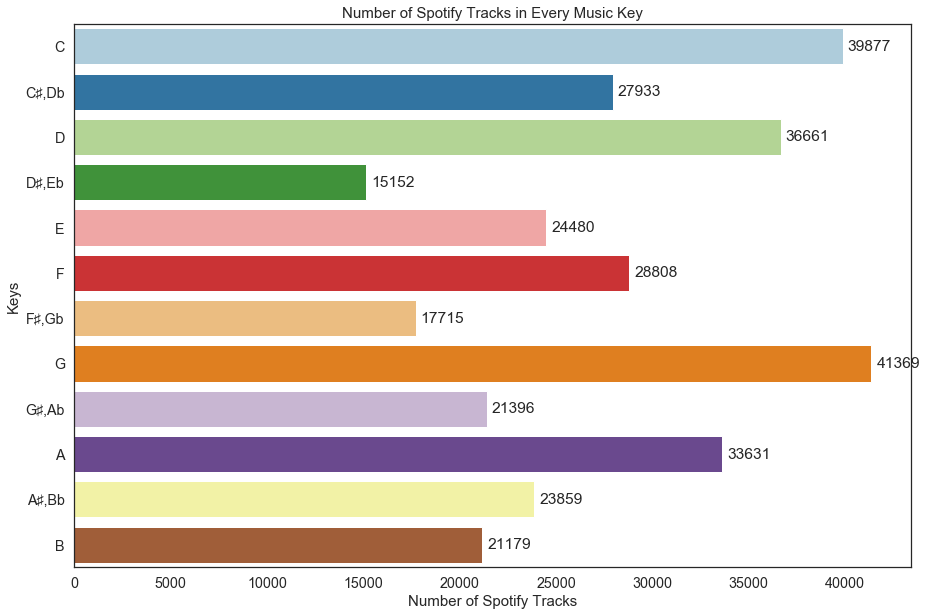

In [31]:
keycount = tracks_table['key'].value_counts()
sns.set_style('white')
plt.rcParams["figure.figsize"] = (15,10)
ax = sns.barplot(y=keycount.index,x=keycount.values, palette='Paired')
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for positive and negative values.
plt.title("Number of Spotify Tracks in Every Music Key", fontsize=15)
plt.xlabel('Number of Spotify Tracks', fontsize=15)
plt.ylabel('Keys',fontsize=15)
plt.show()

## Is there a difference in distribution of acousticness between different music keys?

Majority of the music tracks were in "G" key (41369 tracks), followed closely by "C" key (39877 tracks). There was an unusual low number of music tracks in "D#, Eb" key (15152 tracks), while majority of keys had approximately 20000 to 35000 tracks. Another interesting analysis to perform is to check if a particular music track feature, like "acousticness" has different distributions between music keys using boxplots.

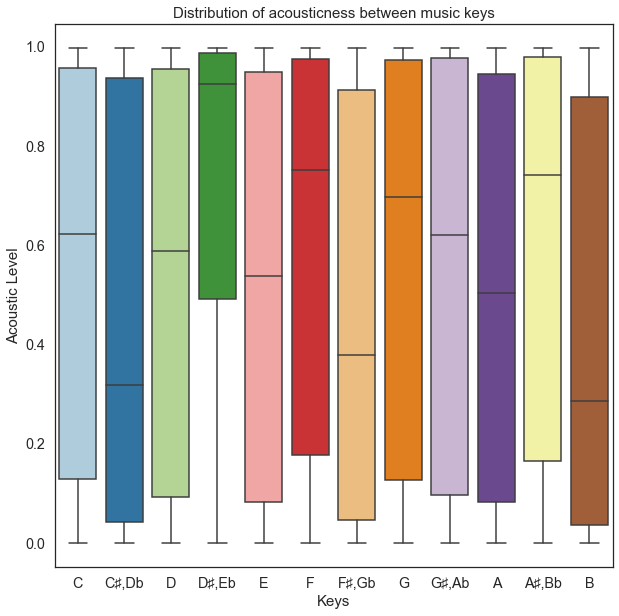

In [32]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = (10,10)
sns.boxplot(data=tracks_table, x='key', y='acousticness', palette='Paired')
plt.title("Distribution of acousticness between music keys", fontsize=15)
plt.xlabel('Keys', fontsize=15)
plt.ylabel('Acoustic Level',fontsize=15)
plt.show()

## Overall Music Feature Analysis for Artists and Album Tracks

From the boxplot above, there is a distinct difference in acousticness distribution between different music keys. While majority of the acousticness distributions are moderately right skewed, distribution of acousticness for "D#, Eb" key is very heavily left skewed and had very low variability in comparison to other music keys.

Using custom defined functions below, we can compare values of several music features on artist and album track level using multiple radar plots. <b> For this specific example, we will analyse these music features for top 10 artists with most number of followers and Taylor Swift's latest album ("folklore"). </b>

<p><img src='https://mb.com.ph/wp-content/uploads/2020/07/Taylor-swift-folklore-featured-image-2-1024x538.jpg' width="800">

In [33]:
# Custom function for plotting radar plots in subplots
def make_spider(row, title, color, album_data):
    # number of variable
    categories=list(album_data)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True,)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=8)
    plt.ylim(0,1)

    values = album_data.iloc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=14, color=color,y=1.2)

In [34]:
# Custom function for plotting 3*3 subplot of radar plots
def music_radar(album_data, color, name, start_index):
    lengthalbum = len(album_data)
    
    for batch_count in range(math.ceil(len(album_data)/9)):
        # initialize the figure
        my_dpi=96
        fig = plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

        # Create a color palette:
        my_palette = plt.cm.get_cmap(color, 18)

        if lengthalbum>=9:
            for row in range(0, 9):
                make_spider(row=row, title=album_data.iloc[9*batch_count:9*(batch_count+1)].iloc[row][name], \
                            color=my_palette(row+10*batch_count), \
                            album_data = album_data.iloc[9*batch_count:9*(batch_count+1),start_index:])
                plt.subplots_adjust(wspace = 1, hspace=0.6)
        else:
            for row in range(0, lengthalbum):
                make_spider(row=row, title=album_data.iloc[9*batch_count:len(album_data)].iloc[row][name], \
                            color=my_palette(row+10*batch_count),\
                            album_data = album_data.iloc[9*batch_count:len(album_data),start_index:])
                plt.subplots_adjust(wspace = 1, hspace=0.6)
        lengthalbum-=9

In [35]:
index_list = [0,1,2,3,5,7,9] # Extract music features with values ranging from 0 to 1
artist_analysis = artist_group.reset_index().iloc[:,index_list]
artist_analysis

,main_artist_name,acousticness,danceability,energy,liveness,speechiness,valence
0,$uicideBoy$,0.158388,0.727656,0.601666,0.217475,0.136208,0.287758
1,*NSYNC,0.146974,0.619602,0.733195,0.247475,0.045871,0.602319
2,2 Chainz,0.165591,0.715014,0.629254,0.285170,0.265139,0.471766
3,21 Savage,0.148118,0.800619,0.510791,0.177766,0.250368,0.346948
4,24kGoldn,0.118910,0.742500,0.617000,0.133370,0.171190,0.520500
...,...,...,...,...,...,...,...
961,deadmau5,0.117356,0.688433,0.621542,0.193583,0.089228,0.281283
962,fun.,0.266603,0.529635,0.639058,0.190006,0.062169,0.485712
963,gnash,0.514310,0.661585,0.371829,0.182715,0.196868,0.304568
964,iann dior,0.266957,0.693031,0.581250,0.135003,0.076219,0.464541


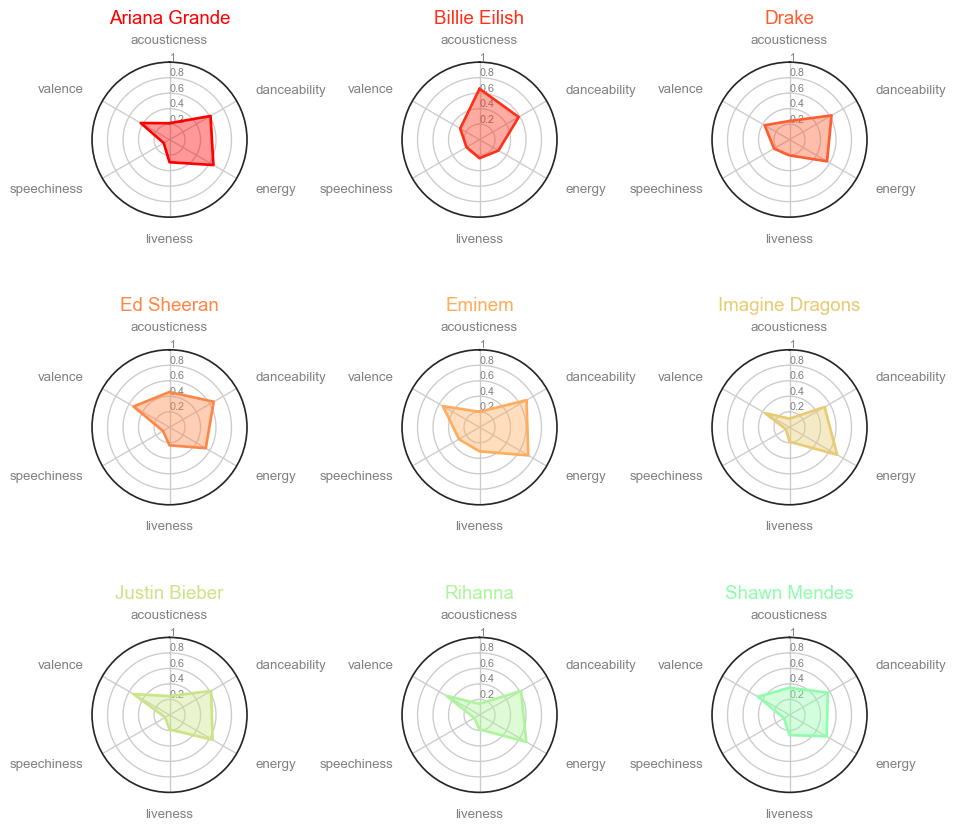

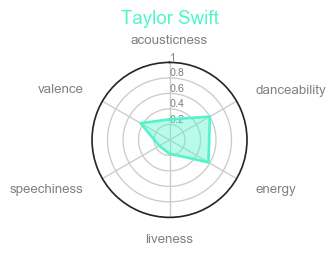

In [36]:
# Average music features analysis for top 10 artists with most number of followers
artist_list = top10followers['artist_name']
music_radar(artist_analysis[artist_analysis['main_artist_name'].isin(artist_list)], 'rainbow_r','main_artist_name',1)

From the radar plots above, Eminem dominated the rankings for highest average of majority of the music features listed above. However, there was an exception for Billie Eilish, who ranked the highest average of acousticness (high confidence that the track is acoustic) among the top 10 artists with most number of followers.

In [37]:
index_list = [0,1,5,12,13,14,16,18,20] # Extract music features with values ranging from 0 to 1
track_analysis = tracks_table.iloc[:,index_list]
track_analysis

,album,main_artist_name,track_name,acousticness,danceability,energy,liveness,speechiness,valence
0,Dark Lane Demo Tapes,Drake,Deep Pockets,0.4820,0.473,0.824,0.6050,0.163,0.3740
1,Dark Lane Demo Tapes,Drake,When To Say When,0.2520,0.410,0.820,0.5380,0.533,0.5260
2,Dark Lane Demo Tapes,Drake,Chicago Freestyle (feat. Giveon),0.6290,0.735,0.449,0.1130,0.347,0.0397
3,Dark Lane Demo Tapes,Drake,Not You Too (feat. Chris Brown),0.3420,0.458,0.452,0.0703,0.047,0.3160
4,Dark Lane Demo Tapes,Drake,Toosie Slide,0.2890,0.830,0.490,0.1130,0.209,0.8450
...,...,...,...,...,...,...,...,...,...
339728,Sway,Marian Hill,Lips,0.5540,0.818,0.332,0.0986,0.269,0.6600
339729,Sway,Marian Hill,Wasted,0.6090,0.779,0.510,0.1330,0.362,0.6890
339730,Sway,Marian Hill,Lovit,0.6540,0.607,0.384,0.1190,0.420,0.2740
339731,Sway,Marian Hill,Deep,0.2940,0.710,0.256,0.0832,0.199,0.2850


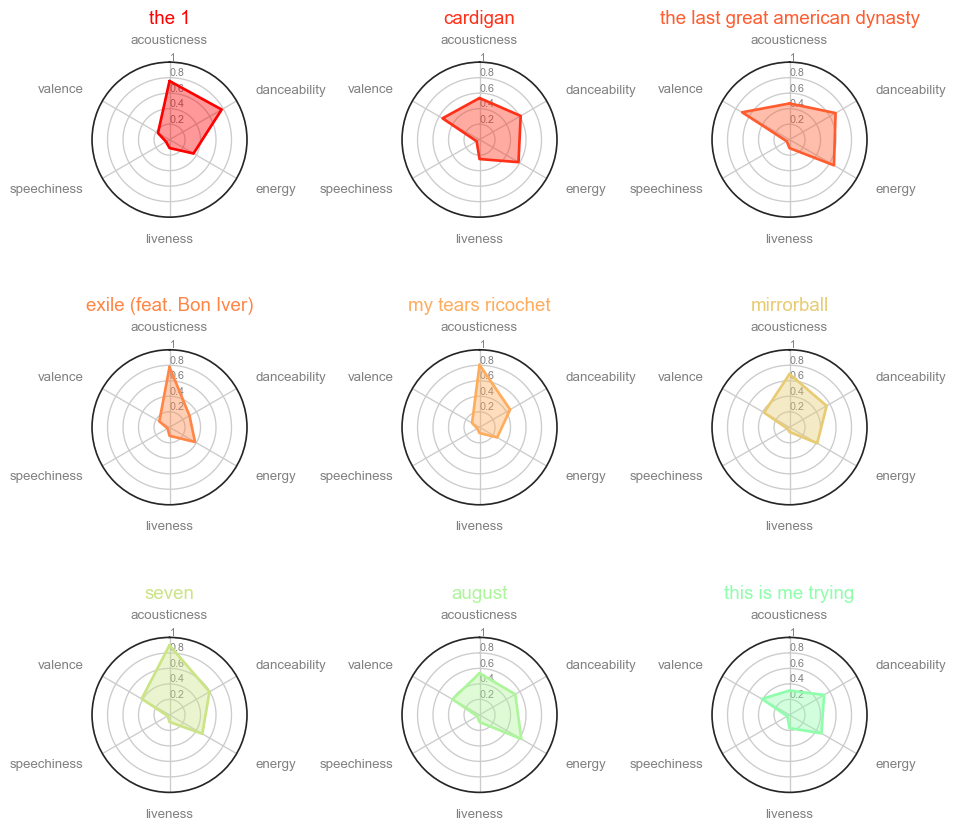

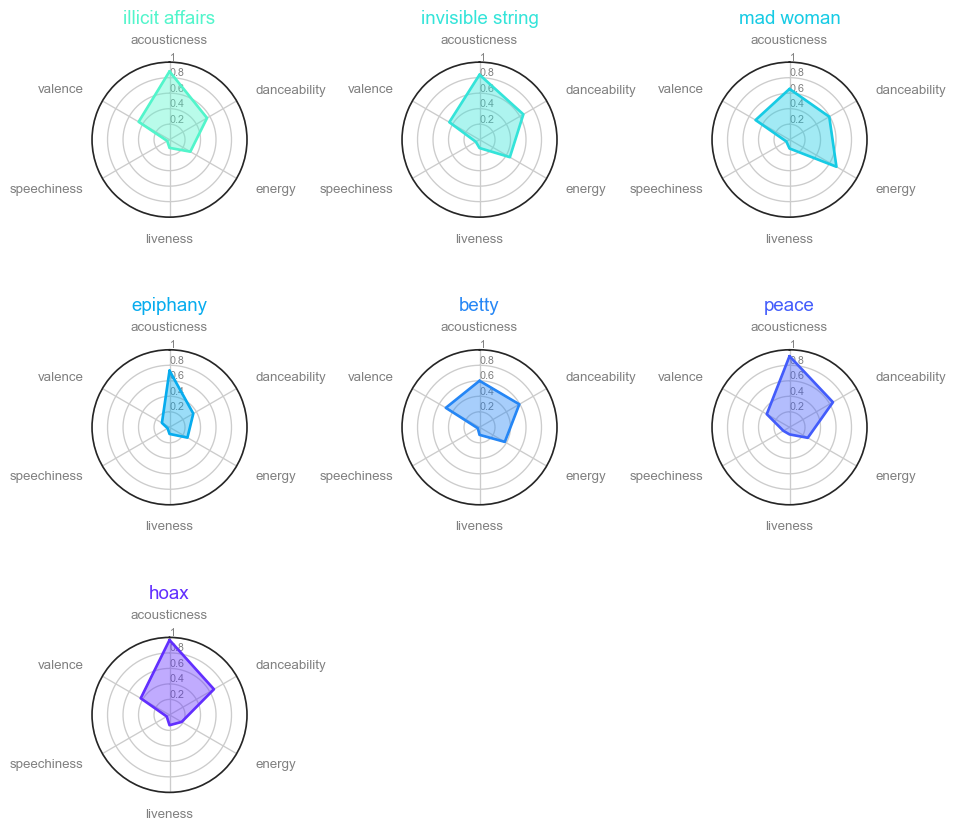

In [38]:
# Taylor Swift's latest album track analysis
music_radar(track_analysis[track_analysis['album']=='folklore'], 'rainbow_r','track_name',3)

In summary, majority of Taylor Swift's music for this album is acoustic (high acousticness) with very few songs that are suitable to dance to as a departure from her usual upbeat pop sound. Unlike her previous music albums, this album consist mostly of mellow tunes driven by her piano and guitar, which provides an overall relaxed atmosphere for listeners to listen to. While some of her songs like "Cardigan" and "The Last Great American Dynasty" provide positive vibes (high valence), most of her songs for this album have slightly moderate to low valence levels.

## BLACKPINK's Music Feature Analysis

BLACKPINK has recently caught the attention of many fans and the public with their latest kpop music comeback. They are the highest-charting female Korean act on the Billboard Hot 100, first female kpop group to perform at Coachella and the most subscribed Youtube channel (>50m) amongst many other korean artists. Given I am a fan of BLACKPINK's music, I will provide a music feature analysis on their music to gain a better understanding on what makes their music very popular today.

<p><img src='https://149367133.v2.pressablecdn.com/wp-content/uploads/2020/10/BLACKPINK-Lovesick-Girls-4K-UHD-13.png' width="800">

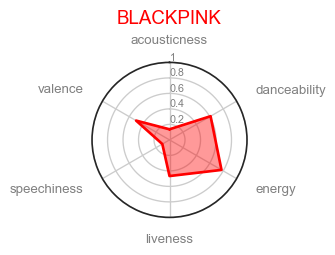

In [39]:
# BLACKPINK's Overall Music Feature Analysis
music_radar(artist_analysis[artist_analysis['main_artist_name']=='BLACKPINK'], 'rainbow_r','main_artist_name',1)

In [40]:
index_list = [3,4,5,7,9,11]
album_analysis = tracks_table[tracks_table['main_artist_name']=='BLACKPINK'].groupby('album').mean()\
.iloc[4:,index_list].reset_index()
album_analysis

,album,acousticness,danceability,energy,liveness,speechiness,valence
0,BLACKPINK IN YOUR AREA,0.103219,0.691111,0.802889,0.221456,0.068056,0.573444
1,THE ALBUM,0.049236,0.690375,0.663250,0.114775,0.122737,0.527625


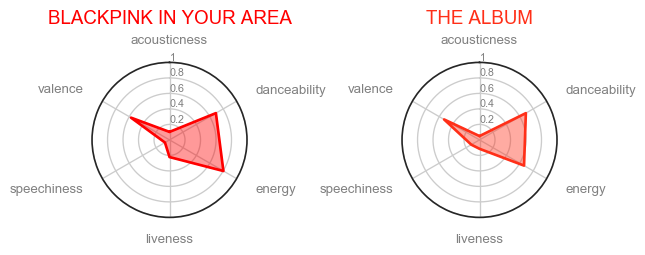

In [41]:
# BLACKPINK's Album Analysis
music_radar(album_analysis, 'rainbow_r','album',1)

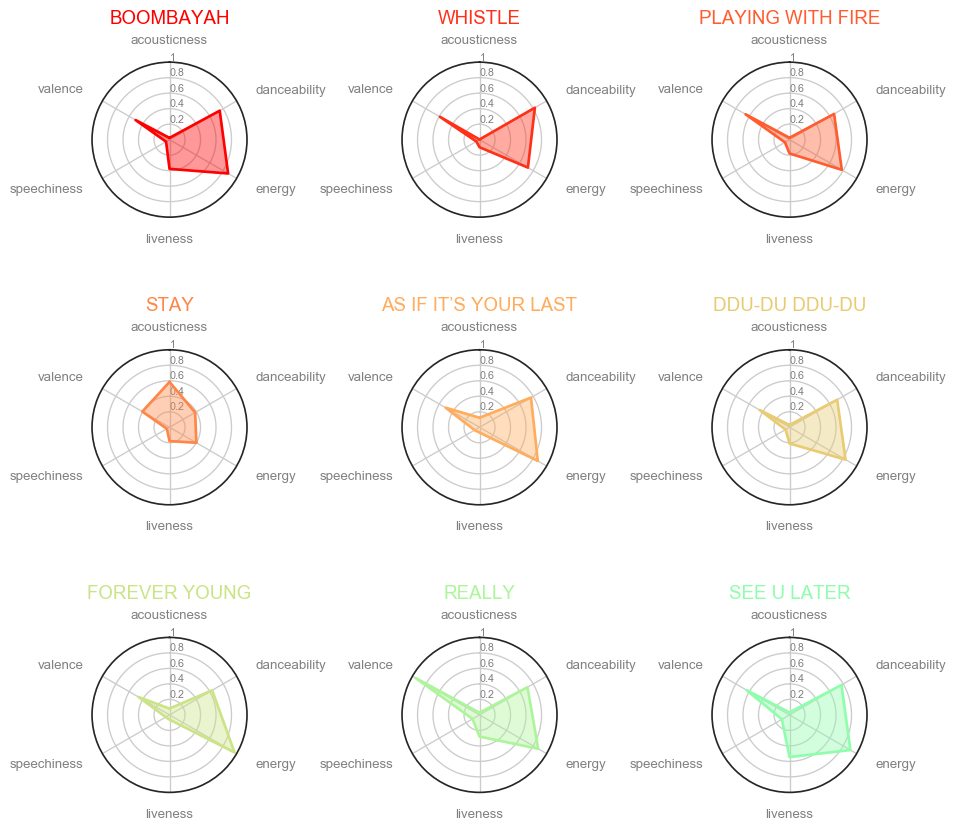

In [42]:
# BLACKPINK's latest album track analysis
music_radar(track_analysis[track_analysis['album']=='BLACKPINK IN YOUR AREA'], 'rainbow_r','track_name',3)

From the radar plots above, the following observations can be made for each music feature:
1. Song with highest energy level: <b>"Forever Young"</b>
2. Song that sounds the most positive (High valence) : <b>"Really"</b>
3. Most suitable song to dance to (High danceability) : <b>"Whistle"</b>
4. Song with highest probability of performed live (High liveness) : <b>"See U Later"</b>
5. Song with highest confidence is acoustic (High acousticness) : <b>"Stay"</b>
6. Song with highest presence of spoken words (High speechiness) : <b>"See U Later"</b>

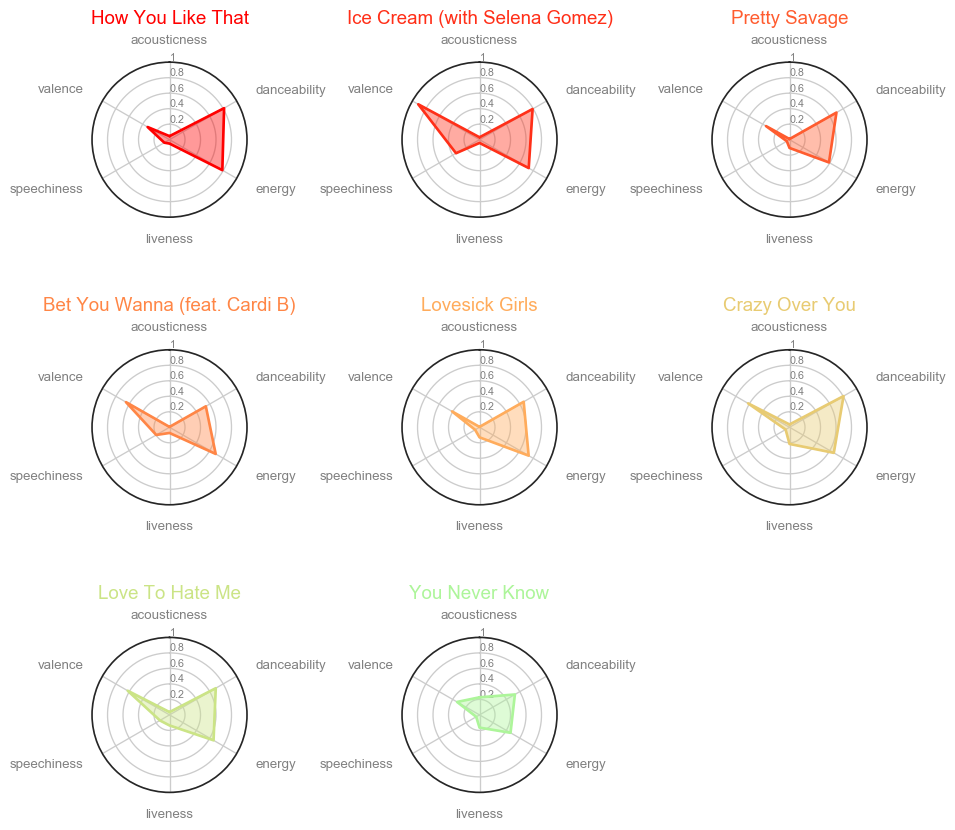

In [43]:
# BLACKPINK's latest album track analysis
music_radar(track_analysis[track_analysis['album']=='THE ALBUM'], 'rainbow_r','track_name',3)

From the radar plots above, the following observations can be made for each music feature:
1. Song with highest energy level: <b>"How You Like That"</b>
2. Song that sounds the most positive (High valence) : <b>"Ice Cream (With Selena Gomez)"</b>
3. Most suitable song to dance to (High danceability) : <b>"How You Like That"</b>
4. Song with highest probability of performed live (High liveness) : <b>"Crazy Over You"</b>
5. Song with highest confidence is acoustic (High acousticness) : <b>"You Never Know"</b>
6. Song with highest presence of spoken words (High speechiness) : <b>"Ice Cream (With Selena Gomez)"</b>

In summary, majority of their songs have very high energy levels (> 0.7) and they manage to deliver a consistent positive vibe (high valence) of their albums' tracks. The previous album (BlackPink In Your Area) had more songs that are very suitable to dance to with high energy levels, in comparison to their current album (The Album). However, there is overall higher presence of spoken words (high speechiness) in their latest album through music collaborations with Selena Gomez and Cardi B. Both albums have at least one song that is acoustic (You Never Know, Stay), which gives listeners something different to listen to from BLACKPINK's usual deliverance of music with high positive energy.

### That sums up my exploratory data analysis about the top 1000 most streamed artists on Spotify. Credits are given to ChartMasters for updating the dataset on Spotify streams for each artist on a daily basis and Spotify for providing the web API for easier data extraction. And thanks for taking the time to look at my project, which I hope you find it insightful.